In [1]:
import numpy as np
import pandas as pd
import itertools
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Read the data
df = pd.read_csv('daily-total-female-births.csv', parse_dates = ['Date'], index_col = 'Date')

In [4]:
df.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [5]:
df.tail()

,Births
Date,
1959-12-27,37
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50


In [7]:
df.isnull().sum()

Births    0
dtype: int64

In [8]:
#Check data types
df.dtypes

Births    int64
dtype: object

<AxesSubplot:xlabel='Date'>

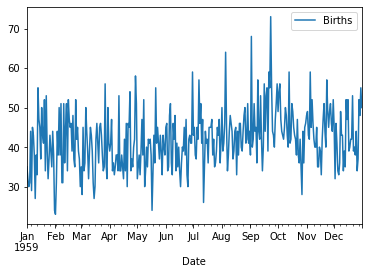

In [9]:
#Visualise the time series
df.plot()

Doesn't show very clear trend and seasonality.

In [10]:
#Additive decomposition
df_add_decompose = seasonal_decompose(df, model = 'additive')

In [14]:
#Plot the time series
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

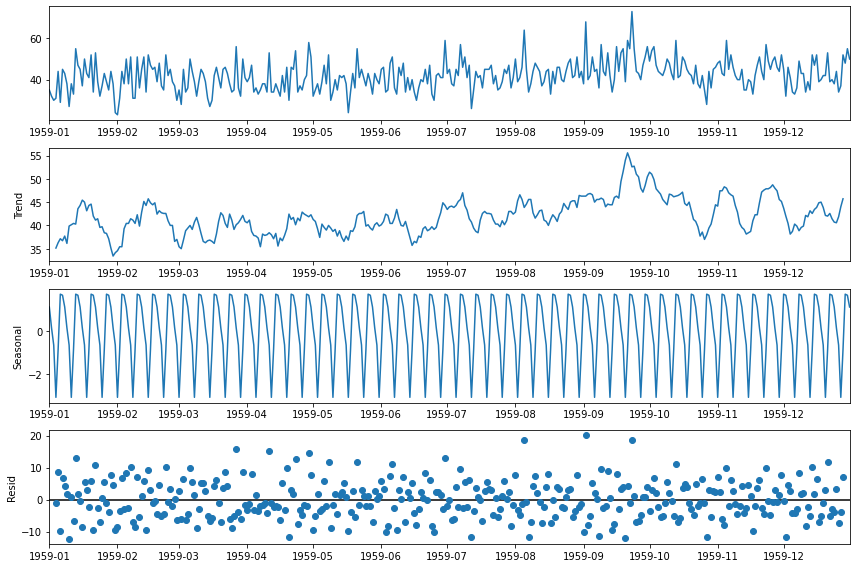

In [15]:
df_add_decompose.plot()
plt.show()


In [13]:
#Let's inspect each component 
df_add_decompose.trend

Date
1959-01-01          NaN
1959-01-02          NaN
1959-01-03          NaN
1959-01-04    35.142857
1959-01-05    36.285714
                ...    
1959-12-27    44.000000
1959-12-28    45.714286
1959-12-29          NaN
1959-12-30          NaN
1959-12-31          NaN
Name: trend, Length: 365, dtype: float64

In [16]:
df_add_decompose.seasonal

Date
1959-01-01    1.105812
1959-01-02    0.142226
1959-01-03   -0.656093
1959-01-04   -3.077608
1959-01-05   -0.868817
                ...   
1959-12-27   -3.077608
1959-12-28   -0.868817
1959-12-29    1.702450
1959-12-30    1.652030
1959-12-31    1.105812
Name: seasonal, Length: 365, dtype: float64

In [17]:
df_add_decompose.resid

Date
1959-01-01         NaN
1959-01-02         NaN
1959-01-03         NaN
1959-01-04   -1.065249
1959-01-05    8.583102
                ...   
1959-12-27   -3.922392
1959-12-28    7.154531
1959-12-29         NaN
1959-12-30         NaN
1959-12-31         NaN
Name: resid, Length: 365, dtype: float64

In [18]:
#Since this is an additive model:
#Observed = Trend + Seasonal + Irregular should hold true
35.142857 -3.077608 -1.065249

31.0

In [19]:
df.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


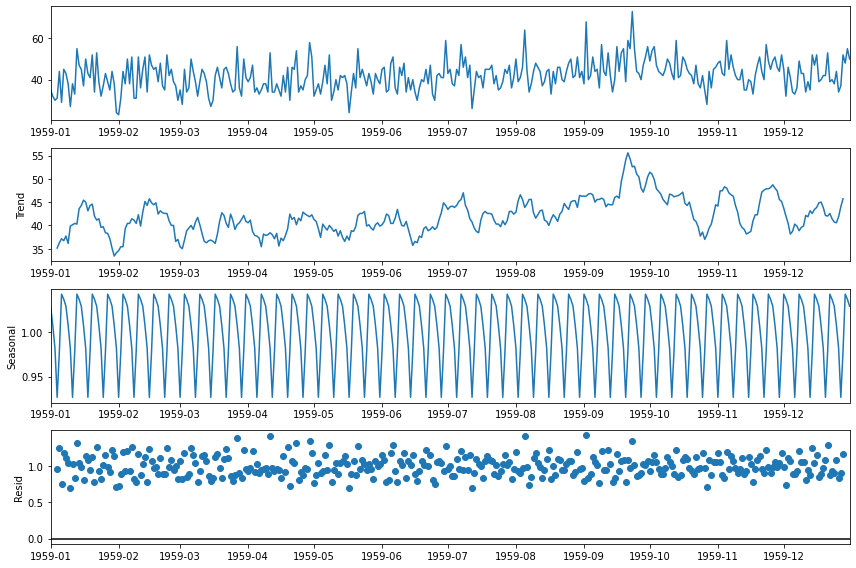

In [22]:
#Multiplicative decomposition
df_mul_decompose = seasonal_decompose(df, model = 'multiplicative')
df_mul_decompose.plot()
plt.show()

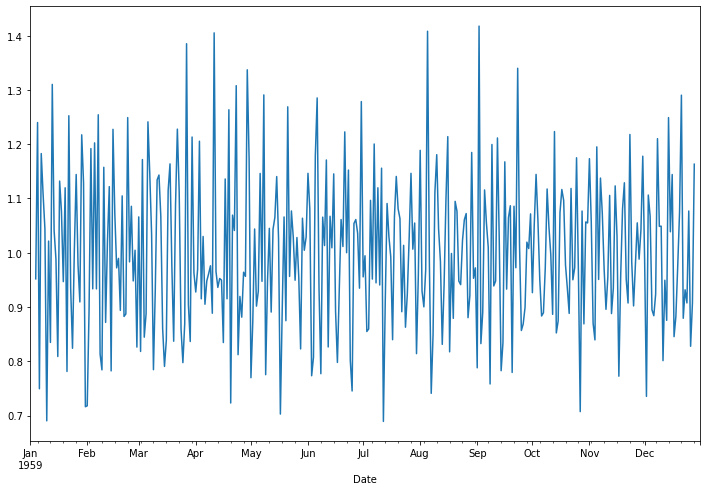

In [23]:
df_mul_decompose.resid.plot()
plt.show()

In [24]:
#Let's inspect each component
df_mul_decompose.trend

Date
1959-01-01          NaN
1959-01-02          NaN
1959-01-03          NaN
1959-01-04    35.142857
1959-01-05    36.285714
                ...    
1959-12-27    44.000000
1959-12-28    45.714286
1959-12-29          NaN
1959-12-30          NaN
1959-12-31          NaN
Name: trend, Length: 365, dtype: float64

In [25]:
df_mul_decompose.seasonal

Date
1959-01-01    1.028509
1959-01-02    1.007079
1959-01-03    0.981494
1959-01-04    0.926726
1959-01-05    0.977911
                ...   
1959-12-27    0.926726
1959-12-28    0.977911
1959-12-29    1.041987
1959-12-30    1.036295
1959-12-31    1.028509
Name: seasonal, Length: 365, dtype: float64

In [26]:
df_mul_decompose.resid

Date
1959-01-01         NaN
1959-01-02         NaN
1959-01-03         NaN
1959-01-04    0.951861
1959-01-05    1.239989
                ...   
1959-12-27    0.907398
1959-12-28    1.163194
1959-12-29         NaN
1959-12-30         NaN
1959-12-31         NaN
Name: resid, Length: 365, dtype: float64

In [27]:
#Since this is a multiplicative model:
#Observed = Trend*Seasonality*Irregular
35.14*.93*.952

31.1115504

# Downsampling

In [28]:
#Let's change the monthly series to quarterly. This would require aggregation.
df_q = df.resample('Q').mean()

<AxesSubplot:xlabel='Date'>

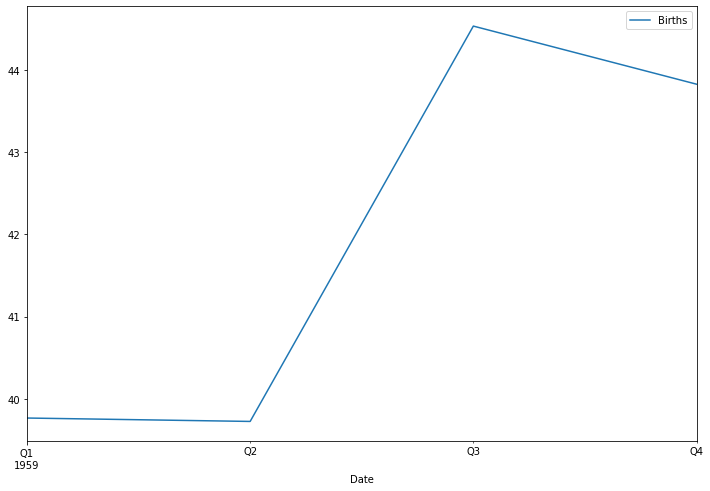

In [29]:
df_q.plot()

# upsampling

In [30]:
#Let's change the monthly series to daily. 
df_d = df.resample('D').ffill()

<AxesSubplot:xlabel='Date'>

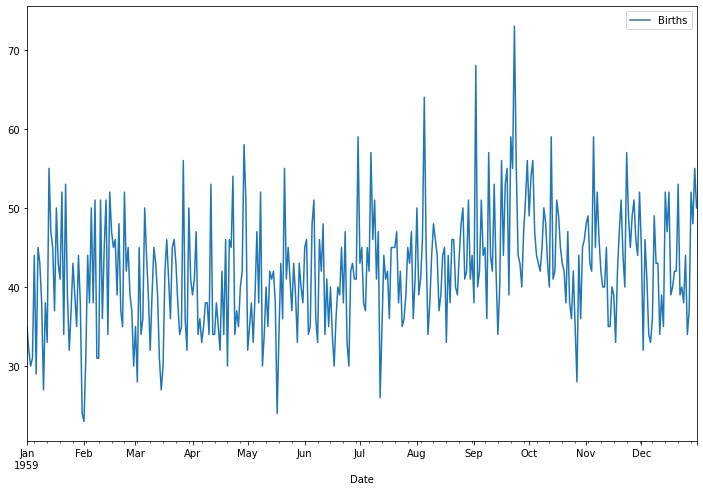

In [32]:
df_d.plot()

In [33]:
#Let's change the monthly series to hourly. 
df_h = df.resample('H').interpolate()